In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from scipy.optimize import curve_fit
import statistics
from scipy import asarray as ar,exp
from scipy.signal import chirp, find_peaks, peak_widths

In [7]:
#Am241-nFz
An = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Am-241_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#Am241-pFz
Ap = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Am-241_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#Am241-nMCZ
AnC = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Am-241_nMCz_V150_test.txt", skiprows = 0, unpack = True)
#Ba-133_nFZ
Bn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Ba-133_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#Ba-133_pFZ
Bp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Ba-133_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#Ba-133_nMCz
BnC = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Ba-133_nMCz_V150_test.txt", skiprows = 0, unpack = True)
#Co-57_nFZ
Cn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Co-57_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#Co-57_pFZ
Cp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Co-57_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#Co-57_nMCz
CnC = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/Co-57_nMCz_V150_test.txt", skiprows = 0, unpack = True)
#noise nFz
Abn = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nFZ2_V150_test.txt", skiprows = 0, unpack = True)
#noise pFz
Abp = np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_pFZ_V150_test.txt", skiprows = 0, unpack = True)
#noise nMCZ
AbnC= np.loadtxt("C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/SRD2020_data/SRD2020_Spectra/noise-bkg_nMCz_V150_test.txt", skiprows = 0, unpack = True)

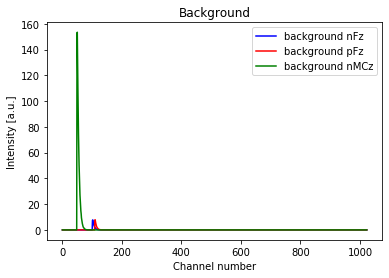

In [30]:
x=ar(range(1024))
#Normalization
A=Abn/300.005000
B=Abp/300.004000
C=AbnC/155.215000
#Background plot
plt.plot(x,A,'b-', label='background nFz')
plt.plot(x,B,'r-', label='background pFz')
plt.plot(x,C,'g-', label='background nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title('Background')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/background.pdf', format='pdf')
plt.show()

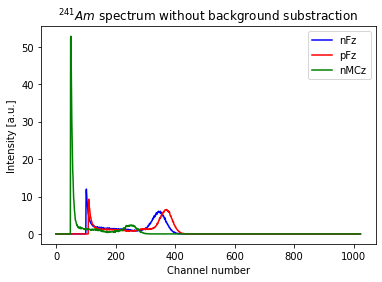

In [31]:
#Isotope spectra without background substraction
#241Am
Ax= An/300.308000
Bx=Ap/300.308000
Cx=AnC/95.287000
plt.plot(x,Ax,'b-', label='nFz')
plt.plot(x,Bx,'r-', label='pFz')
plt.plot(x,Cx,'g-', label='nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{241}Am$ spectrum without background substraction')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Am_wo_background.pdf', format='pdf')
plt.show()

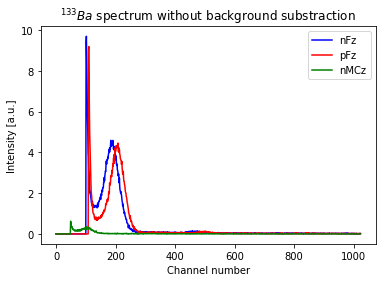

In [32]:
#133Ba
A1x= Bn/300.156000
B1x=Bp/300.145000
C1x=BnC/300.009000
plt.plot(x,A1x,'b-', label='nFz')
plt.plot(x,B1x,'r-', label='pFz')
plt.plot(x,C1x,'g-', label='nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{133}Ba$ spectrum without background substraction')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Ba_wo_background.pdf', format='pdf')
plt.show()

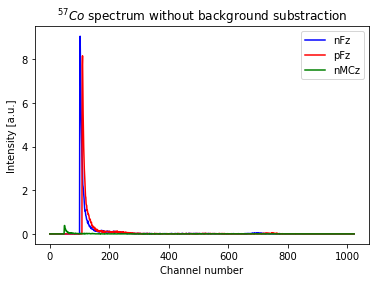

In [33]:
#57Co
A2x= Cn/300.019000
B2x=Cp/300.019000
C2x=CnC/300.001000
plt.plot(x,A2x,'b-', label='nFz')
plt.plot(x,B2x,'r-', label='pFz')
plt.plot(x,C2x,'g-', label='nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{57}Co$ spectrum without background substraction')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Co_wo_background.pdf', format='pdf')
plt.show()

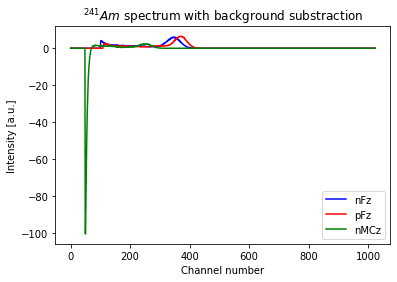

In [34]:
#Isotope spectra with background substraction
#241Am
Anr=Ax-A
Apr=Bx-B
AnCr=(Cx-C)
plt.plot(x,Anr,'b-', label='nFz')
plt.plot(x,Apr,'r-', label='pFz')
plt.plot(x,AnCr,'g-', label='nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{241}Am$ spectrum with background substraction')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Am_w_background.pdf', format='pdf')
plt.show()

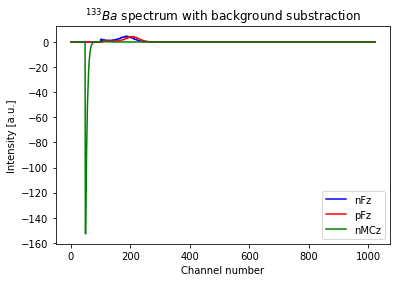

In [35]:
#133Ba
Bnr=A1x-A
Bpr=B1x-B
BnCr=C1x-C
plt.plot(x,Bnr,'b-', label='nFz')
plt.plot(x,Bpr,'r-', label='pFz')
plt.plot(x,BnCr,'g-', label='nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{133}Ba$ spectrum with background substraction')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Ba_w_background.pdf', format='pdf')
plt.show()

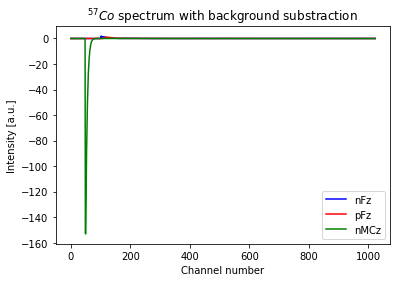

In [36]:
#57Co
Cnr=A2x-A
Cpr=B2x-B
CnCr=C2x-C
plt.plot(x,Cnr,'b-', label='nFz')
plt.plot(x,Cpr,'r-', label='pFz')
plt.plot(x,CnCr,'g-', label='nMCz')
plt.xlabel('Channel number')
plt.ylabel('Intensity [a.u.]')
plt.title(r'$^{57}Co$ spectrum with background substraction')
plt.legend(loc='best')
#plt.savefig('C:/Users/RP/Documents/Uni_Helsinki/PAP339/Lab_project/Co_w_background.pdf', format='pdf')
plt.show()